# Support Vector Machine (SVM) model

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

For deeper intuition of SVM, see https://towardsdatascience.com/deep-dive-into-support-vector-machine-654c8d517103

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

In [4]:
reviews = pd.read_csv("../Data/comments_preproc.csv").sample(n=50000, random_state=0)
reviews.dropna(subset=["cleanedComment"], inplace=True)
reviews.reset_index(inplace=True, drop=True)

reviews["sentiment"] = reviews["clarityRating"].apply(lambda x: 1 if x > 2.5 else 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(reviews["cleanedComment"], reviews["sentiment"], test_size=0.2, random_state=1)

In [6]:
def runSVM(ngr=(1,1), kernel="linear", c=1):
    tfidf_vect = TfidfVectorizer(max_features=7000, ngram_range=ngr)
    tfidf_vect.fit(reviews["cleanedComment"])

    train_feat = tfidf_vect.transform(X_train)
    test_feat = tfidf_vect.transform(X_test)

    svm = SVC(C=c, kernel=kernel, degree=3, gamma="auto")
    svm.fit(train_feat, y_train)

    y_pred = svm.predict(test_feat)

    acc = accuracy_score(y_test, y_pred) * 100
    print("Accuracy: {0}".format(acc))
    print("F1 Score: {0}".format(f1_score(y_test, y_pred) * 100))

    return acc

In [7]:
def plotC():
    c_vals = range(1, 10)
    accs = []
    for c in c_vals:
        print("Running model for C = {0}".format(c))
        acc = runSVM(ngr=(1,2), c=c)
        print("\tFinished model for C = {0}".format(c))
        accs.append(acc)
    
    plt.scatter(c_vals, accs)
    plt.figure(figsize=(25,5))
    plt.show()

Running model for C = 1
Accuracy: 87.03
F1 Score: 91.35621459513494
	Finished model for C = 1
Running model for C = 2
Accuracy: 86.63
F1 Score: 91.02744782229381
	Finished model for C = 2
Running model for C = 3
Accuracy: 86.38
F1 Score: 90.85169263836646
	Finished model for C = 3
Running model for C = 4
Accuracy: 85.99
F1 Score: 90.58277878604557
	Finished model for C = 4
Running model for C = 5
Accuracy: 85.71
F1 Score: 90.37775233990976
	Finished model for C = 5
Running model for C = 6
Accuracy: 85.46000000000001
F1 Score: 90.1889338731444
	Finished model for C = 6
Running model for C = 7
Accuracy: 85.28999999999999
F1 Score: 90.07221434838361
	Finished model for C = 7
Running model for C = 8
Accuracy: 85.1
F1 Score: 89.94058871185527
	Finished model for C = 8
Running model for C = 9
Accuracy: 84.97
F1 Score: 89.85076642582214
	Finished model for C = 9


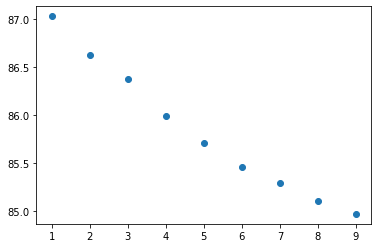

<Figure size 1800x360 with 0 Axes>

In [8]:
plotC()

In [9]:
def plotKernels():
    kernels = ["linear", "poly", "rbf", "sigmoid"]
    accs = []
    for kernel in kernels:
        print("Running model for Kernel type \"{0}\"".format(kernel))
        acc = runSVM(ngr=(1,2), kernel=kernel)
        print("\tFinished model for Kernel type \"{0}\"".format(kernel))
        accs.append(acc)
    
    plt.scatter(kernels, accs)
    plt.figure(figsize=(25,5))
    plt.show()

Running model for Kernel type "linear"
Accuracy: 87.03
F1 Score: 91.35621459513494
	Finished model for Kernel type "linear"
Running model for Kernel type "poly"
Accuracy: 73.58
F1 Score: 84.77935245996082
	Finished model for Kernel type "poly"
Running model for Kernel type "rbf"
Accuracy: 73.58
F1 Score: 84.77935245996082
	Finished model for Kernel type "rbf"
Running model for Kernel type "sigmoid"
Accuracy: 73.58
F1 Score: 84.77935245996082
	Finished model for Kernel type "sigmoid"


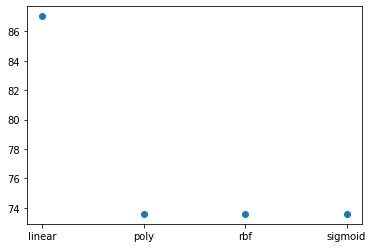

<Figure size 1800x360 with 0 Axes>

In [10]:
plotKernels()

In [14]:
runSVM(ngr=(1,1))

Accuracy: 86.09
F1 Score: 90.80330578512397


86.09

In [15]:
runSVM(ngr=(2,2))

Accuracy: 83.66
F1 Score: 89.41435605079036


83.66

In [16]:
runSVM(ngr=(1,2))

Accuracy: 87.03
F1 Score: 91.35621459513494


87.03